In [4]:
import torch

In [5]:
torch.__version__

'2.1.2'

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.ones(4,4)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [9]:
torch.ones(4,4,4,4) # [time, x-axis, y-axis, z-axis]


tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]],


        [[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]],


        [[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],


In [10]:
torch.rand(4,4)

tensor([[0.8366, 0.9183, 0.3040, 0.4608],
        [0.0205, 0.9710, 0.8023, 0.1604],
        [0.3084, 0.5220, 0.8992, 0.7923],
        [0.5145, 0.8598, 0.8877, 0.3846]])

In [11]:
cube1 =torch.rand(4,4)
cube2 = torch.rand(4,4)

In [12]:
cube1 + cube2

tensor([[0.7868, 1.2868, 0.5244, 0.8655],
        [0.3453, 0.6346, 1.1836, 0.3355],
        [0.9145, 1.0226, 0.9596, 1.2002],
        [1.3180, 0.9587, 1.5058, 1.7919]])

In [13]:
my_torch_array = torch.rand(3,3)

In [16]:
my_torch_array2 = my_torch_array.to('cuda:0')

In [17]:
my_torch_array + my_torch_array2

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [23]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder


In [28]:
class PlayingCardDataset(Dataset):
    def __init__(self,data_dir,transform= None ):
        self.data_dir = data_dir
        self.transform = transform
        self.data = ImageFolder(data_dir, transform= transform)
    def __len__(self):
        #Retrun the lenght of the dataset
        return len(self.data)

    def __getitem__(self,idx):
        # Return the item from the dataset
        # For the provided index
        # Typically it returns (image, class)
        return self.data[idx] # tuple (img, class)
    
    def classes(self):
        return self.data.classes

In [30]:
data_dir = 'train'
dataset = PlayingCardDataset(data_dir)

In [31]:
len(dataset)

7624

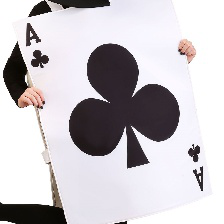

In [33]:
dataset[0][0]

In [34]:
dataset[0][1]

0

In [75]:

for img, label in dataset:
    pass


In [76]:
label

52

In [37]:
transform = transforms.Compose([
    transforms.Resize([128,128]),
    transforms.ToTensor(),
])  

In [79]:
dataset = PlayingCardDataset(data_dir=data_dir, transform=transform)

In [80]:
dataset[0][0].shape

torch.Size([3, 128, 128])

# Dataloaders

In [40]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [83]:
for img, labels in dataloader:
    break

In [84]:
img.shape

torch.Size([32, 3, 128, 128])

In [70]:
img.shape # [batch-size, channel, height, width]

torch.Size([32, 3, 128, 128])

In [44]:
labels.shape

torch.Size([32])

# Create our Pytorch Model

In [45]:
!pip install timm

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.6 kB 682.7 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 645.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.2 MB 2.2 MB/s eta 0:00:01
   --- ------------------------------------ 0.2/2.2 MB 2.1 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/2.2 MB 1.6 MB/s eta 0:00:02
   ---- ----------------------------------- 0.3/2.2 MB 1.4 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.2 MB 1.3 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.2 MB 1.3 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.2 MB 1.2 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.2 MB 1.2 MB/s eta 0:00:02
   --------

In [49]:
import timm
import torch.nn as nn

In [48]:
base_model = timm.create_model('efficientnet_b0',pretrained=True)

model.safetensors: 100%|██████████| 21.4M/21.4M [00:22<00:00, 956kB/s]
c:\Users\alidb\.conda\envs\AI\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\alidb\.cache\huggingface\hub\models--timm--efficientnet_b0.ra_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [97]:
class SimpleCardClassifier(nn.Module):
    def __init__(self,num_classes = 53):
        super(SimpleCardClassifier,self).__init__()
        # Define the layers of the model 
        self.base_model = timm.create_model('efficientnet_b0',pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])
        #output size 1280
        self.classifier =nn.Sequential(nn.Flatten(), nn.Linear(1280,53))

    def forward(self,x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [86]:
model = SimpleCardClassifier()

In [87]:
model

SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, ke

In [88]:
model(img)

tensor([[-0.2188, -0.2303,  0.5524,  ...,  0.0135,  0.3600, -0.8447],
        [-0.0879,  0.1134, -0.0846,  ...,  0.0017,  0.3063,  0.0428],
        [ 0.2423,  0.4501, -0.2326,  ...,  0.2563, -0.0789, -0.3220],
        ...,
        [-0.2707, -0.0431,  0.1846,  ..., -0.2147, -0.2232, -0.1356],
        [ 0.1465, -0.0306, -0.2378,  ...,  0.1727, -0.0757,  0.0379],
        [ 0.0920,  0.0840,  0.4121,  ..., -0.4087, -0.4535, -0.3912]],
       grad_fn=<AddmmBackward0>)

# 3. Training the Model

* Pytorch Training Loop

In [89]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

train_folder = "train/"
test_folder = 'test/'
valid_folder = 'valid'

train_dataset = PlayingCardDataset(data_dir=train_folder,transform=transform)
test_dataset = PlayingCardDataset(data_dir=test_folder,transform=transform)
valid_dataset = PlayingCardDataset(data_dir=valid_folder,transform=transform)

train_loader = DataLoader(train_dataset,batch_size=32, shuffle= True)
test_loader = DataLoader(test_dataset,batch_size=32, shuffle= False)
valid_loader = DataLoader(valid_dataset,batch_size=32, shuffle= False)

# 2. Things to Define

In [90]:
import torch.optim as optim
#loss function
criterion = nn.CrossEntropyLoss()
#Optimezer


In [99]:
num_epochs = 5 
train_losses = []
val_losses = []

model = SimpleCardClassifier()
model.to('cuda:0')
optimizer = optim.Adam(model.parameters(),lr = 0.001)
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for imgs, labels in train_loader: 
        optimizer.zero_grad()
        outputs = model(imgs.to('cuda:0'))
        loss = criterion(outputs,labels.to('cuda:0'))
        loss.backward()
        optimizer.step()
        running_loss += loss.item() + imgs.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    print(f"Epoch {epoch + 1} / {num_epochs} - Train loss: {train_loss}")
    
        

Epoch 1 / 5 - Train loss: 1.049295773356371
Epoch 2 / 5 - Train loss: 1.0172122396149545
Epoch 3 / 5 - Train loss: 1.0110407507658818
Epoch 4 / 5 - Train loss: 1.0079618197961555
Epoch 5 / 5 - Train loss: 1.0054625416091953


In [100]:
model

SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, ke

In [101]:
!pip install matplotlib

     ---------------------------------------- 0.0/160.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/160.4 kB ? eta -:--:--
     -------------- ------------------------ 61.4/160.4 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 160.4/160.4 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
    --------------------------------------- 0.1/7.6 MB 3.6 MB/s eta 0:00:03
    --------------------------------------- 0.2/7.6 MB 2.1 MB/s eta 0:00:04
   - -------------------------------------- 0.2/7.6 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.6 MB 1.4 MB/s eta 0:00:06
   - -------------------------------------- 0.3/7.6 MB 1.5 MB/s eta 0:00:06
   - -------------------------------------- 0.4/7.6 MB 1.3 MB/s eta 0:00:06
   -- ------------------------------------- 0.4/7.6 MB 1.3 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/7.6 MB 1.2 MB/s eta 0:00:06
   -- ----------